In [1]:
import tensorflow as tf
import librosa
import librosa.display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix

import IPython.display as ipd

In [2]:
df = pd.read_csv(r"C:\Users\LENOVO\Desktop\DL\torgo_data\data.csv")
df

,is_dysarthria,gender,filename
0,non_dysarthria,female,torgo_data/non_dysarthria_female/FC03_Session2...
1,non_dysarthria,female,torgo_data/non_dysarthria_female/FC02_Session3...
2,non_dysarthria,female,torgo_data/non_dysarthria_female/FC02_Session3...
3,non_dysarthria,female,torgo_data/non_dysarthria_female/FC03_Session2...
4,non_dysarthria,female,torgo_data/non_dysarthria_female/FC03_Session1...
...,...,...,...
1995,dysarthria,male,torgo_data/dysarthria_male/M03_Session2_0144.wav
1996,dysarthria,male,torgo_data/dysarthria_male/M02_Session1_0005.wav
1997,dysarthria,male,torgo_data/dysarthria_male/M03_Session2_0040.wav
1998,dysarthria,male,torgo_data/dysarthria_male/M03_Session2_0260.wav


In [3]:
dir_ = "C:/Users/LENOVO/Desktop/DL/"

df['relative_path'] = dir_ + df['filename']

In [4]:
df = df[['is_dysarthria', 'gender','relative_path']]

df.head()

,is_dysarthria,gender,relative_path
0,non_dysarthria,female,C:/Users/LENOVO/Desktop/DL/torgo_data/non_dysa...
1,non_dysarthria,female,C:/Users/LENOVO/Desktop/DL/torgo_data/non_dysa...
2,non_dysarthria,female,C:/Users/LENOVO/Desktop/DL/torgo_data/non_dysa...
3,non_dysarthria,female,C:/Users/LENOVO/Desktop/DL/torgo_data/non_dysa...
4,non_dysarthria,female,C:/Users/LENOVO/Desktop/DL/torgo_data/non_dysa...


**Distribution of Dysarthia based on Gender**

In [85]:
target = df.groupby('is_dysarthria').count()['gender']
target

is_dysarthria
dysarthria        1000
non_dysarthria    1000
Name: gender, dtype: int64

**Visualize the waveplot, MFCC, and Mel Spectrogram for any 1 random sample of
dysarthric male, dysarthric female, non-dysarthric male, and non-dysarthric female.**

In [6]:
# Waveplot
def get_waveplot(path, is_dysarthria, gender):
  x,sr = librosa.load(path)
  plt.figure(figsize=(20, 5))
  librosa.display.waveshow(x, sr=sr)
  plt.title('Waveplot of ' +is_dysarthria+' '+gender)
  plt.show()

# MFCC
def mfcc(path,is_dysarthria,gender):
    x, sr = librosa.load(path)
    plt.figure(figsize=(20, 6))
    plt.title("MFCC Spectral of  "  +is_dysarthria+' ' +gender )
    mfccs = librosa.feature.mfcc(y=x, sr=sr)
    librosa.display.specshow(mfccs, sr=sr, x_axis='time')
    plt.show()
    
# Mel Spectogram
def mel_Spectogram(path,is_dysarthria,gender):
    x, sr = librosa.load(path)
    plt.figure(figsize=(20, 6))
    plt.title("Mel Spectrogram of "  +is_dysarthria+ ' '+gender )
    mel_spec = librosa.feature.melspectrogram(y=x, sr=sr)
    librosa.display.specshow(mel_spec, sr=sr, x_axis='time')
    plt.show()

For Non-Dysarthric Male

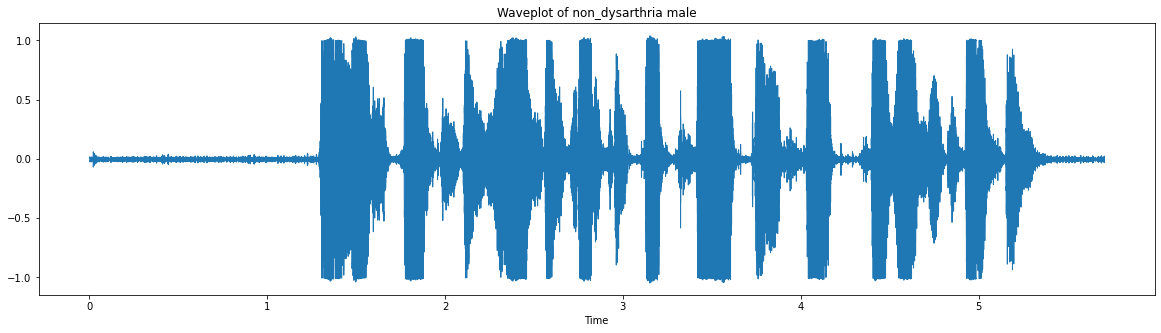

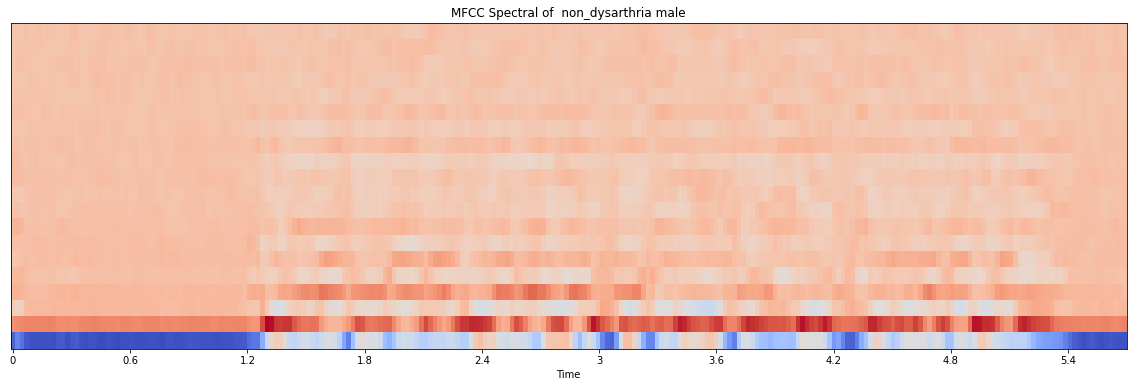

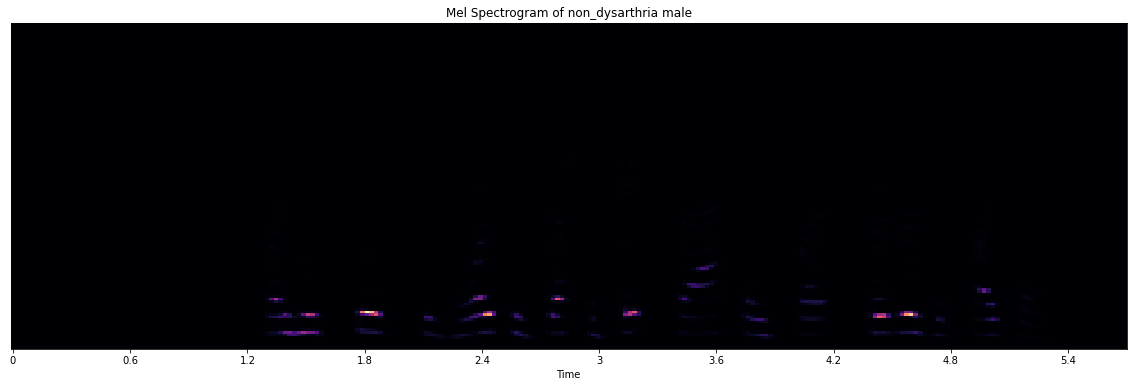

In [7]:
sample = df[(df['is_dysarthria']=='non_dysarthria') & (df['gender']=='male')]
get_waveplot(sample['relative_path'].values[0], sample['is_dysarthria'].values[0], sample['gender'].values[0])
ipd.Audio(sample['relative_path'].values[0])

mfcc(sample['relative_path'].values[0], sample['is_dysarthria'].values[0], sample['gender'].values[0])
ipd.Audio(sample['relative_path'].values[0])

mel_Spectogram(sample['relative_path'].values[0], sample['is_dysarthria'].values[0], sample['gender'].values[0])
ipd.Audio(sample['relative_path'].values[0])


For Non-Dysarthric female

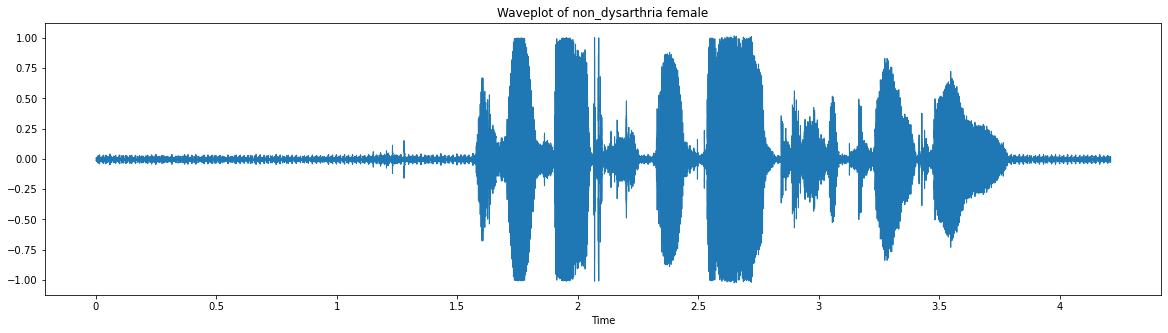

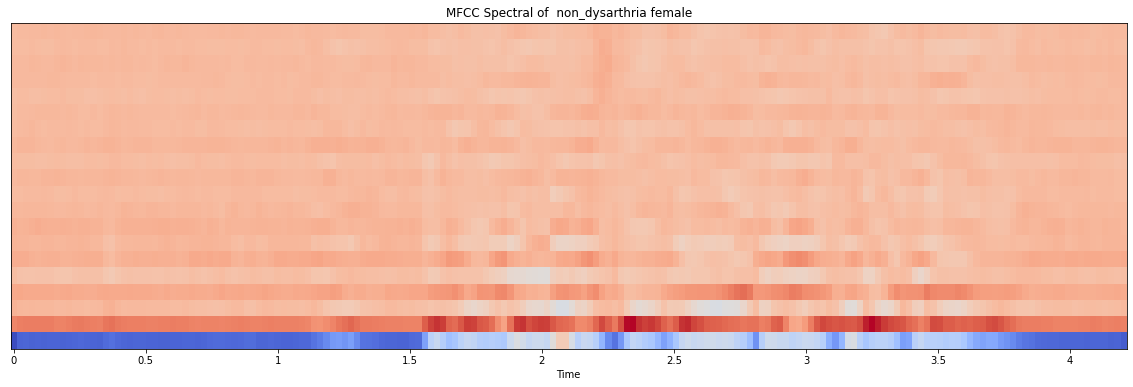

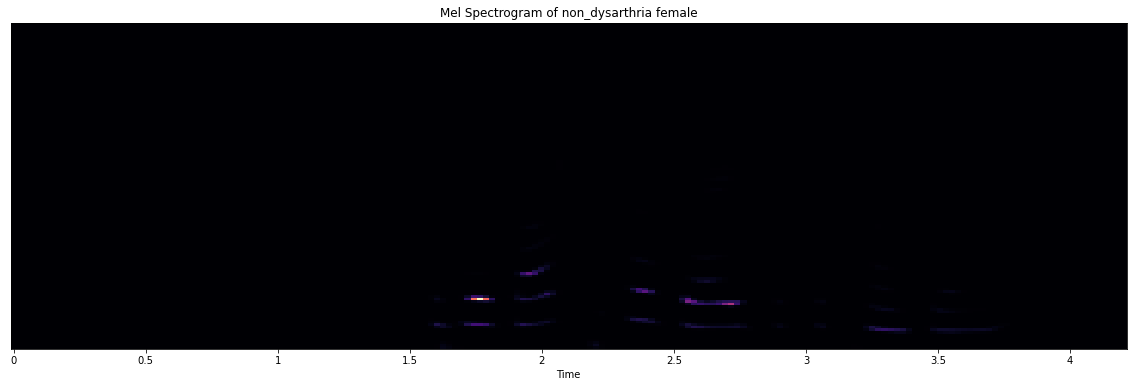

In [8]:
sample1 = df[(df['is_dysarthria']=='non_dysarthria') & (df['gender']=='female')]
get_waveplot(sample1['relative_path'].values[0], sample1['is_dysarthria'].values[0], sample1['gender'].values[0])
ipd.Audio(sample1['relative_path'].values[0])

mfcc(sample1['relative_path'].values[0], sample1['is_dysarthria'].values[0], sample1['gender'].values[0])
ipd.Audio(sample1['relative_path'].values[0])

mel_Spectogram(sample1['relative_path'].values[0], sample1['is_dysarthria'].values[0], sample1['gender'].values[0])
ipd.Audio(sample1['relative_path'].values[0])

For Dysarthric Male

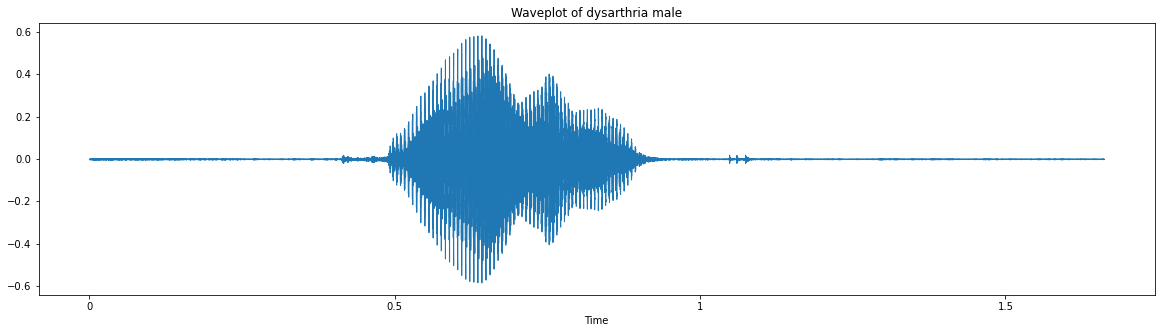

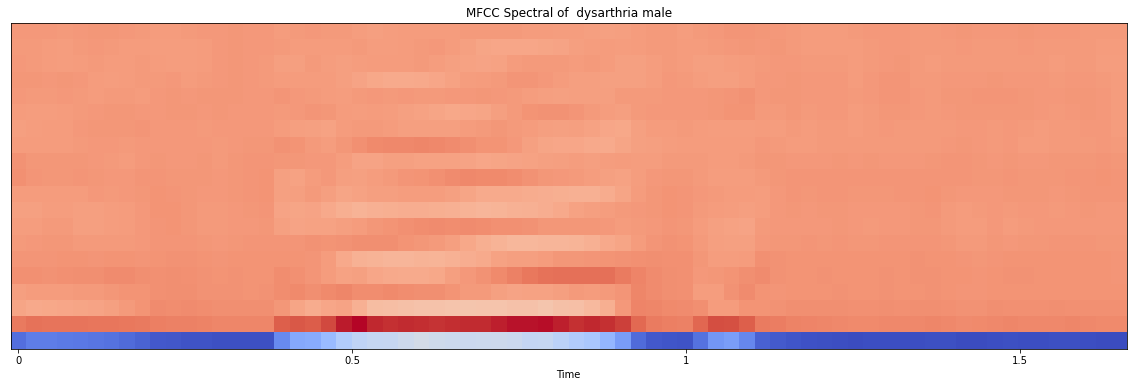

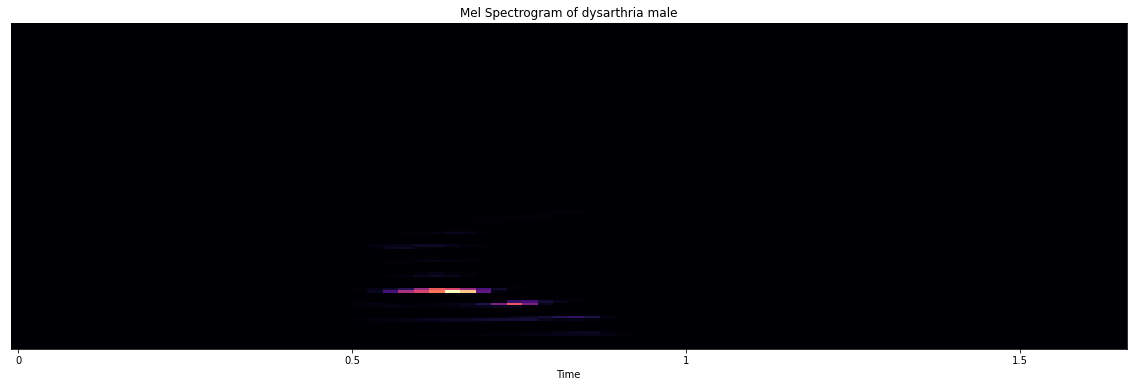

In [9]:
sample2 = df[(df['is_dysarthria']=='dysarthria') & (df['gender']=='male')]
get_waveplot(sample2['relative_path'].values[0], sample2['is_dysarthria'].values[0], sample2['gender'].values[0])
ipd.Audio(sample2['relative_path'].values[0])

mfcc(sample2['relative_path'].values[0], sample2['is_dysarthria'].values[0], sample2['gender'].values[0])
ipd.Audio(sample2['relative_path'].values[0])

mel_Spectogram(sample2['relative_path'].values[0], sample2['is_dysarthria'].values[0], sample2['gender'].values[0])
ipd.Audio(sample2['relative_path'].values[0])

For Dysarthric Female

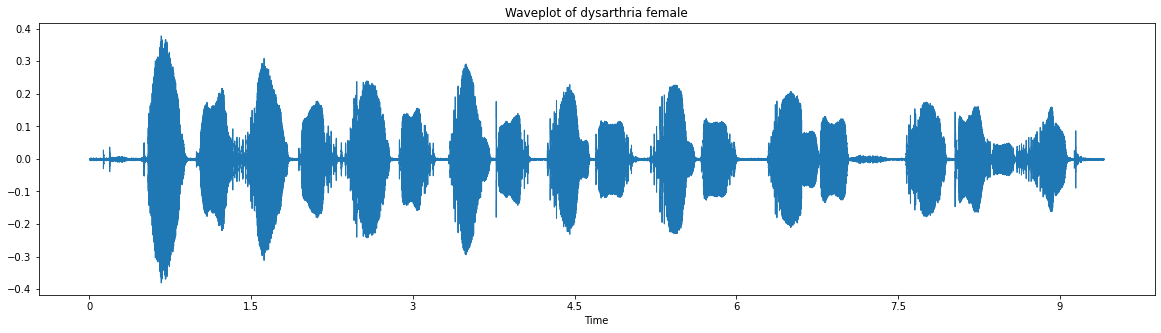

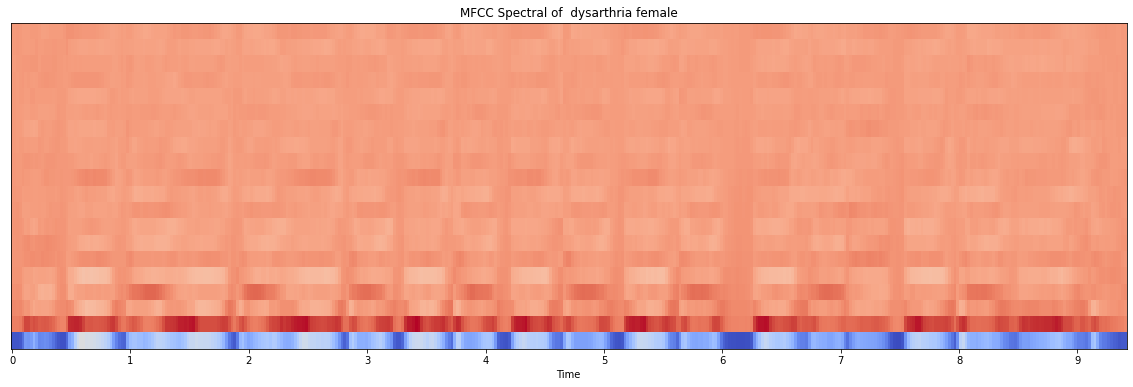

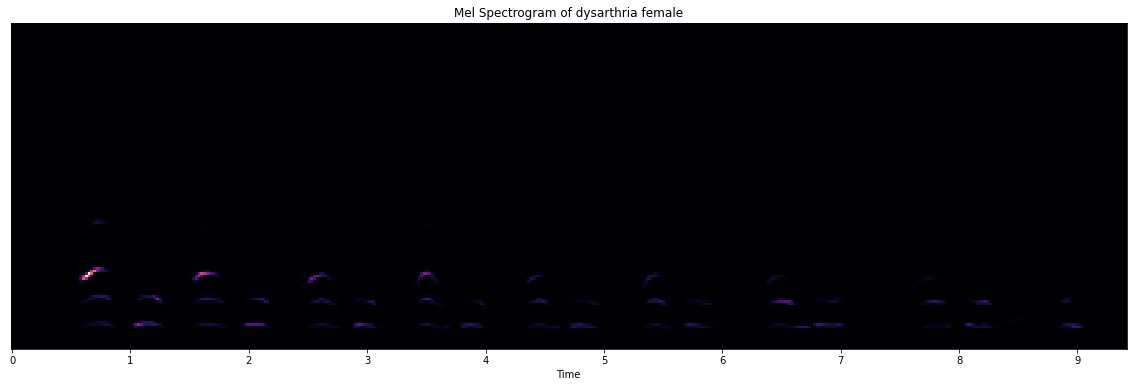

In [10]:
sample3 = df[(df['is_dysarthria']=='dysarthria') & (df['gender']=='female')]
get_waveplot(sample3['relative_path'].values[0], sample3['is_dysarthria'].values[0], sample3['gender'].values[0])
ipd.Audio(sample3['relative_path'].values[0])

mfcc(sample3['relative_path'].values[0], sample3['is_dysarthria'].values[0], sample3['gender'].values[0])
ipd.Audio(sample3['relative_path'].values[0])

mel_Spectogram(sample3['relative_path'].values[0], sample3['is_dysarthria'].values[0], sample3['gender'].values[0])
ipd.Audio(sample3['relative_path'].values[0])

In [11]:
def create_mfcc_features(path):
  mfccs = []
  try:
    x,sr = librosa.load(path, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=128)
    mfccs = np.mean(mfccs.T, axis=0)
  except:
    print('Error found in audio')
  return mfccs

In [13]:
%%time
X_df= pd.DataFrame(df['relative_path'].apply(lambda x:create_mfcc_features(x)).tolist())

Error found in audio
CPU times: total: 4min 25s
Wall time: 1min 6s


In [14]:
X_df.head()


,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-224.438873,104.723663,-19.202602,39.938480,-13.626342,19.401268,-2.989149,7.090681,5.540167,-4.092600,...,1.392820,0.930601,0.773945,1.034358,0.405939,0.070030,0.552779,0.592358,0.169803,-0.219082
1,-302.286743,113.484200,-19.854023,40.338875,-16.874350,21.476728,4.538599,15.209646,7.216094,1.010592,...,1.252204,1.162079,1.028046,1.249662,0.058755,-1.421318,0.025139,-0.040994,-0.033689,-0.771382
2,-306.246368,116.362526,-27.005041,46.734200,-22.540213,24.665691,3.921143,14.105978,8.822406,0.725400,...,0.957378,0.889208,0.483508,1.060316,0.021912,-1.448233,0.280857,0.198465,-0.227241,-0.582115
3,-214.574188,121.374321,-38.831760,39.828735,-27.346233,23.890163,-4.140902,8.613482,4.424286,-0.632522,...,1.101739,0.597243,0.931670,0.690942,0.201179,-0.113483,0.020272,0.346169,-0.066179,-0.264245
4,-283.527588,108.828957,-20.547583,46.923977,-15.656189,26.488243,-0.345028,12.736641,9.059461,-2.463461,...,1.458694,1.620689,0.947342,0.745661,0.545421,-0.161467,0.146885,-0.305346,-0.452933,-0.471084


In [23]:
encoder = LabelEncoder()
encoder.fit(df['is_dysarthria'])
y = encoder.transform(df['is_dysarthria'])
y = np.delete (y, 600)
y

array([1, 1, 1, ..., 0, 0, 0])

In [24]:
y.shape

(1999,)

In [20]:
x = X_df.copy()

In [21]:
X_df = X_df.dropna()
print(X_df.shape)
X_df.head()

(1999, 128)


,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-224.438873,104.723663,-19.202602,39.938480,-13.626342,19.401268,-2.989149,7.090681,5.540167,-4.092600,...,1.392820,0.930601,0.773945,1.034358,0.405939,0.070030,0.552779,0.592358,0.169803,-0.219082
1,-302.286743,113.484200,-19.854023,40.338875,-16.874350,21.476728,4.538599,15.209646,7.216094,1.010592,...,1.252204,1.162079,1.028046,1.249662,0.058755,-1.421318,0.025139,-0.040994,-0.033689,-0.771382
2,-306.246368,116.362526,-27.005041,46.734200,-22.540213,24.665691,3.921143,14.105978,8.822406,0.725400,...,0.957378,0.889208,0.483508,1.060316,0.021912,-1.448233,0.280857,0.198465,-0.227241,-0.582115
3,-214.574188,121.374321,-38.831760,39.828735,-27.346233,23.890163,-4.140902,8.613482,4.424286,-0.632522,...,1.101739,0.597243,0.931670,0.690942,0.201179,-0.113483,0.020272,0.346169,-0.066179,-0.264245
4,-283.527588,108.828957,-20.547583,46.923977,-15.656189,26.488243,-0.345028,12.736641,9.059461,-2.463461,...,1.458694,1.620689,0.947342,0.745661,0.545421,-0.161467,0.146885,-0.305346,-0.452933,-0.471084


In [26]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(np.array(X_df), y, test_size=0.1)

In [27]:
x_train.shape, x_val.shape


((1799, 128), (200, 128))

In [28]:
x_train = x_train.reshape(x_train.shape[0], 16, 8, 1)
x_val = x_val.reshape(x_val.shape[0], 16, 8, 1)

In [30]:
len(df['is_dysarthria'].unique())


2

In [31]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(16, 8, 1)),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(filters=8, kernel_size=(3,3), activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 8, 16)         160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 4, 16)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 4, 8)           1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 2, 8)          0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 4, 2, 8)           0         
                                                                 
 flatten (Flatten)           (None, 64)                0

In [44]:
from tensorflow import keras
Adam1 = keras.optimizers.Adam(learning_rate=0.0001,beta_1=0.9,beta_2=0.99)
model.compile(optimizer=Adam1, loss='binary_crossentropy', metrics=['accuracy',tf.keras.metrics.Recall()])

In [45]:
x_train.shape, y_train.shape

((1799, 16, 8, 1), (1799,))

In [46]:
history = model.fit(x_train, y_train, epochs=25)

Epoch 1/25
57/57 [==============================] - 2s 6ms/step - loss: 0.1526 - accuracy: 0.9327 - recall_3: 0.9528
Epoch 2/25
57/57 [==============================] - 0s 7ms/step - loss: 0.1483 - accuracy: 0.9472 - recall_3: 0.9462
Epoch 3/25
57/57 [==============================] - 0s 7ms/step - loss: 0.1207 - accuracy: 0.9550 - recall_3: 0.9583
Epoch 4/25
57/57 [==============================] - 0s 7ms/step - loss: 0.1252 - accuracy: 0.9489 - recall_3: 0.9385
Epoch 5/25
57/57 [==============================] - 0s 7ms/step - loss: 0.1236 - accuracy: 0.9511 - recall_3: 0.9605
Epoch 6/25
57/57 [==============================] - 0s 7ms/step - loss: 0.1187 - accuracy: 0.9566 - recall_3: 0.9561
Epoch 7/25
57/57 [==============================] - 0s 7ms/step - loss: 0.1231 - accuracy: 0.9544 - recall_3: 0.9583
Epoch 8/25
57/57 [==============================] - 0s 7ms/step - loss: 0.1069 - accuracy: 0.9578 - recall_3: 0.9594
Epoch 9/25
57/57 [==============================] - 0s 6ms/step 

In [49]:
prob_val = model.predict(x_val)
prob_val

7/7 [==============================] - 0s 4ms/step


array([[5.4887249e-03],
       [4.7207154e-02],
       [9.9993992e-01],
       [9.7680753e-01],
       [7.0077851e-02],
       [1.0000000e+00],
       [9.9909592e-01],
       [7.1762432e-03],
       [9.8981220e-01],
       [1.0000000e+00],
       [9.9988347e-01],
       [9.6841252e-01],
       [7.7536224e-12],
       [8.8881928e-01],
       [9.9386919e-01],
       [9.9999994e-01],
       [8.7465290e-03],
       [8.9212775e-01],
       [9.8871577e-01],
       [7.7851698e-09],
       [2.7401011e-02],
       [1.0000000e+00],
       [3.9497056e-05],
       [9.9915707e-01],
       [2.1958460e-04],
       [6.3169859e-03],
       [2.0745686e-08],
       [9.9999756e-01],
       [9.9910480e-01],
       [1.2734489e-02],
       [1.0109766e-02],
       [2.9871311e-02],
       [7.7733713e-01],
       [9.9662024e-08],
       [1.9971178e-09],
       [9.9998975e-01],
       [6.5923587e-09],
       [9.9998355e-01],
       [2.4738668e-01],
       [1.2928013e-04],
       [1.2709469e-03],
       [2.842893

In [50]:
print("Validation Loss: ", model.evaluate(x_val, y_val)[0])
print("Validation Recall: ", model.evaluate(x_val, y_val)[1])

7/7 [==============================] - 0s 4ms/step - loss: 0.1479 - accuracy: 0.9800 - recall_3: 0.9551
Validation Loss:  0.147877037525177
7/7 [==============================] - 0s 3ms/step - loss: 0.1479 - accuracy: 0.9800 - recall_3: 0.9551
Validation Recall:  0.9800000190734863


In [51]:
confusion_matrix(y_val, np.round(prob_val))

array([[111,   0],
       [  4,  85]], dtype=int64)

In [52]:
from sklearn.metrics import roc_auc_score, recall_score
roc_auc_score(y_val, model.predict(x_val))

7/7 [==============================] - 0s 3ms/step


0.9883591456625164

In [53]:
print(recall_score(y_val,  np.round(prob_val)))


0.9550561797752809


**Changing values for learning rate, beta1 and beta2**

In [76]:
Adam = keras.optimizers.Adam(learning_rate=0.0003,beta_1=0.6,beta_2=0.92)
model.compile(optimizer=Adam, loss='binary_crossentropy', metrics=['accuracy',tf.keras.metrics.Recall()])

In [77]:
history = model.fit(x_train, y_train, epochs=25)


Epoch 1/25
57/57 [==============================] - 1s 3ms/step - loss: 0.0930 - accuracy: 0.9661 - recall_5: 0.9649
Epoch 2/25
57/57 [==============================] - 0s 2ms/step - loss: 0.1044 - accuracy: 0.9616 - recall_5: 0.9616
Epoch 3/25
57/57 [==============================] - 0s 3ms/step - loss: 0.1127 - accuracy: 0.9622 - recall_5: 0.9550
Epoch 4/25
57/57 [==============================] - 0s 3ms/step - loss: 0.0890 - accuracy: 0.9655 - recall_5: 0.9616
Epoch 5/25
57/57 [==============================] - 0s 3ms/step - loss: 0.0976 - accuracy: 0.9605 - recall_5: 0.9638
Epoch 6/25
57/57 [==============================] - 0s 2ms/step - loss: 0.1008 - accuracy: 0.9661 - recall_5: 0.9649
Epoch 7/25
57/57 [==============================] - 0s 2ms/step - loss: 0.0892 - accuracy: 0.9633 - recall_5: 0.9627
Epoch 8/25
57/57 [==============================] - 0s 2ms/step - loss: 0.1005 - accuracy: 0.9644 - recall_5: 0.9638
Epoch 9/25
57/57 [==============================] - 0s 3ms/step 

In [78]:
prob_val = model.predict(x_val)
prob_val

7/7 [==============================] - 0s 1ms/step


array([[2.03681155e-03],
       [2.57472657e-02],
       [9.99991119e-01],
       [9.68555868e-01],
       [1.47656109e-02],
       [1.00000000e+00],
       [9.99630094e-01],
       [6.12771022e-04],
       [9.90644038e-01],
       [1.00000000e+00],
       [9.99922633e-01],
       [8.80141377e-01],
       [1.77386720e-15],
       [8.39357197e-01],
       [9.78428900e-01],
       [1.00000000e+00],
       [3.14894016e-03],
       [8.96655440e-01],
       [9.86816168e-01],
       [3.02844555e-11],
       [7.58326100e-03],
       [1.00000000e+00],
       [8.78433002e-06],
       [9.99336243e-01],
       [5.02701732e-05],
       [1.66725612e-03],
       [1.22371369e-09],
       [9.99999881e-01],
       [9.98980820e-01],
       [6.20369986e-03],
       [1.73884525e-03],
       [2.25151777e-02],
       [7.79743612e-01],
       [9.15725828e-10],
       [1.55822057e-11],
       [9.99996424e-01],
       [2.69533067e-13],
       [9.99990463e-01],
       [2.58329585e-02],
       [1.69570628e-03],


In [79]:
print("Validation Loss: ", model.evaluate(x_val, y_val)[0])
print("Validation Recall: ", model.evaluate(x_val, y_val)[1])

7/7 [==============================] - 0s 2ms/step - loss: 0.1821 - accuracy: 0.9750 - recall_5: 0.9438
Validation Loss:  0.18205824494361877
7/7 [==============================] - 0s 1ms/step - loss: 0.1821 - accuracy: 0.9750 - recall_5: 0.9438
Validation Recall:  0.9750000238418579


In [80]:
confusion_matrix(y_val, np.round(prob_val))


array([[111,   0],
       [  5,  84]], dtype=int64)

In [81]:
from sklearn.metrics import roc_auc_score, recall_score
roc_auc_score(y_val, model.predict(x_val))

7/7 [==============================] - 0s 2ms/step


0.9881566960218645

In [82]:
print(recall_score(y_val,  np.round(prob_val)))

0.9438202247191011


Smaller value of learning rate gives less false positives in the confusion matrix. Recall score was almost same for both the models.